# Spearman and Pearson Correlation

In the following notebook we will determine whether three sets of numbers are correlated.

We will use one more time the thirty politics articles (those labelled p0.txt through p29.txt) contained in the data folder.

Each of the article webpages has three icons labelling counts for a) facebook likes, b) tweets, and c) comments.

### The data

In [1]:
fblikes = [101, 54, 171, 5900, 2400, 385, 14400, 356, 553, 146, 14400, 359, 134, 40, 3400,
           933, 16800, 4400, 303, 7000, 1100, 427, 214, 94, 1300, 1800, 882, 90, 2800, 2400]
tweets = [48, 29, 67, 950, 201, 103, 757, 108, 130, 41, 901, 80, 63, 43, 205,
          95, 432, 260, 127, 326, 75, 108, 60, 52, 147, 228, 75, 51, 291, 761]
comments = [274, 290, 98, 546, 111, 185, 1900, 108, 563, 158, 934, 1100, 885, 122, 166,
           332, 1700, 1800, 213, 2300, 3000, 11, 63, 107, 142, 466, 327, 49, 2000, 194]

### Importing Libraries

In [2]:
from scipy.stats import pearsonr,spearmanr,linregress
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Determine correlation between the sets

For the three pairwise possibilities, we weill check using `pearsonr()` and `spearmanr()` (both from `scipy.stats`) whether they are positively or negatively correlated with less than `p=.05` (meaning that there's less than a 5% probability that the observed correlation would be seen in randomized data).

In [3]:
for pair,c1,c2 in ('fb/tw',fblikes,tweets),('fb/co',fblikes,comments),('tw/co',tweets,comments):
    r,p=pearsonr(c1,c2)
    print(pair,'Pearson  r={:.2f}, p={:.6f}'.format(r,p))
    r,p=spearmanr(c1,c2)
    print('      Spearman r={:.2f}, p={:.6f}'.format(r,p))

fb/tw Pearson  r=0.74, p=0.000002
      Spearman r=0.93, p=0.000000
fb/co Pearson  r=0.50, p=0.004842
      Spearman r=0.58, p=0.000735
tw/co Pearson  r=0.27, p=0.142944
      Spearman r=0.47, p=0.008601


The results above show that they are all positively correlated (with the Spearman correlation between facebook likes and tweets particularly strong with r=.93). Only the Pearson tweet/comment correlation is not statistically significant at the p=.05 level.

We also notice from the results that the pair tw/co has a statistically significant Spearman, but not Pearson, correlation. Let's try to graph it to get some intuition. 

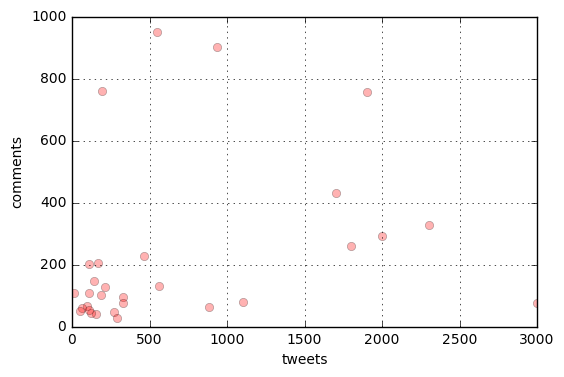

In [4]:
plt.plot(comments,tweets,'ro',alpha=.3)
plt.xlabel('tweets')
plt.ylabel('comments')
plt.grid('on');

Pearson was not able to see the linear regression because the data is spread out.

Now, for each word, let's determine whether its number counts in the thirty articles have a statistically significant correlation (again at the less than `p =.05` level) with each of the three count lists, using the two types of correlation. We'll just print a list of words, giving the value of the Pearson or Spearman correlation, or both, if statistically significant. 

In [5]:
testwords = ['about', 'are', 'been', 'bush', 'candidate', 'cruz', 'hampshire', 'has',
             'have', 'her', 'new', 'obama', 'out', 'party', 'president', 'she',
             'state', 'the', 'this', 'was', 'were', 'which', 'will', 'win']

In [6]:
ptexts=[open('data/p{}.txt'.format(i)).read() for i in range(30)]

In [7]:
import re
from collections import Counter

wordcounter = [Counter(re.findall('[a-z]+', ptexts[i].lower())) for i in range(len(ptexts))]

In [8]:
def w_test(w):
    counts=[c[w] for c in wordcounter]
    for clist,lab in zip((fblikes,tweets,comments),('fb','tw','co')):
        r,p=pearsonr(counts,clist)
        if p<.05: print('{}/{} Pearson  r={:.2f}, p={:.6f}'.format(w,lab,r,p))
        r,p=spearmanr(counts,clist)
        if p<.05: print('{}/{} Spearman r={:.2f}, p={:.6f}'.format(w,lab,r,p))

In [9]:
for w in testwords: w_test(w)

about/fb Pearson  r=0.37, p=0.043212
about/fb Spearman r=0.40, p=0.030467
about/tw Pearson  r=0.54, p=0.002213
about/tw Spearman r=0.52, p=0.003306
are/tw Spearman r=-0.39, p=0.034086
been/fb Spearman r=-0.40, p=0.030489
been/tw Spearman r=-0.37, p=0.042871
bush/fb Spearman r=-0.36, p=0.048523
bush/co Spearman r=-0.38, p=0.037912
candidate/fb Spearman r=-0.51, p=0.004016
candidate/tw Pearson  r=-0.36, p=0.049033
candidate/tw Spearman r=-0.46, p=0.009707
cruz/tw Pearson  r=0.46, p=0.011164
hampshire/fb Pearson  r=-0.38, p=0.038373
hampshire/fb Spearman r=-0.58, p=0.000763
hampshire/tw Pearson  r=-0.41, p=0.025318
hampshire/tw Spearman r=-0.65, p=0.000108
has/fb Spearman r=-0.37, p=0.045807
have/co Spearman r=0.45, p=0.012104
her/co Pearson  r=0.51, p=0.003629
new/fb Pearson  r=-0.40, p=0.028577
new/fb Spearman r=-0.60, p=0.000492
new/tw Pearson  r=-0.47, p=0.009203
new/tw Spearman r=-0.72, p=0.000007
obama/co Pearson  r=0.41, p=0.023994
out/fb Spearman r=-0.39, p=0.034711
party/tw Pears

### Find most correlated words

Lastly, we will find words from the above tests that have the most positive and most negative Pearson correlations between number counts and each of the three lists.

In [10]:
plist={'fb':[],'tw':[],'co':[]}
for w in testwords:
    counts=[c[w] for c in wordcounter]
    for clist,lab in zip((fblikes,tweets,comments),('fb','tw','co')):
        r,p=pearsonr(counts,clist)
        if p<.05: plist[lab].append((w,r,p))

In [11]:
for m in max,min:
   for lab in ('fb','tw','co'):
       print(lab,m(plist[lab],key=lambda x:x[1]))
   print()

fb ('president', 0.47188160505044835, 0.0084721575440603516)
tw ('about', 0.53706047291383308, 0.0022125814879941463)
co ('she', 0.63480048053090932, 0.00016457778749341651)

fb ('new', -0.39985352242322153, 0.02857665659532841)
tw ('new', -0.46742494363223464, 0.0092029490096462545)
co ('president', 0.39389143259482368, 0.031264888900746315)



In [12]:
def view(w,clist,ylab=''):
    counts=[c[w] for c in wordcounter]
    plt.plot(counts,clist,'o',alpha=.33)
    lr=linregress(counts,clist)
    xr=np.arange(max(counts)+1)
    plt.plot(xr,lr[0]*xr+lr[1],label='slope={:.2f}'.format(lr[0]))
    plt.xlabel('#occurrences of word "{}"'.format(w))
    plt.title('slope={:.2f}'.format(lr[0]))
    plt.ylabel(ylab)
    plt.xlim(-.5,max(counts)+.5)
    plt.ylim(-.05*max(clist),1.05*max(clist))

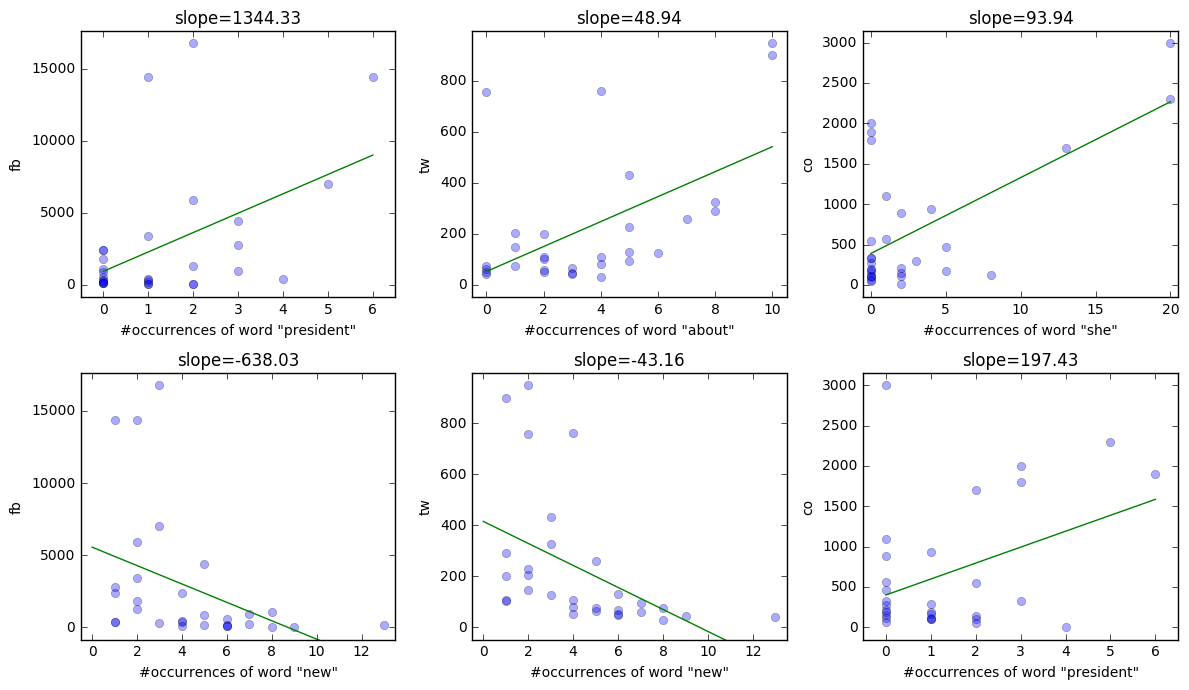

In [13]:
i=0
plt.figure(figsize=(12,7))
for w,clist,lab in zip(('president','about','she'),(fblikes,tweets,comments),('fb','tw','co')):
    i+=1
    plt.subplot(2,3,i)
    view(w,clist,lab)
for w,clist,lab in zip(('new','new','president'),(fblikes,tweets,comments),('fb','tw','co')):
    i+=1
    plt.subplot(2,3,i)
    view(w,clist,lab)
plt.tight_layout()